In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("./diabetes.csv")
df = data

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [9]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', "BMI"]

for col in cols:
    df[col] = df[col].replace(0, np.nan)
    df[col] = df[col].fillna(round(df[col].mean(skipna=True)))

In [13]:
X = df.iloc[:, :8]
y = df['Outcome']

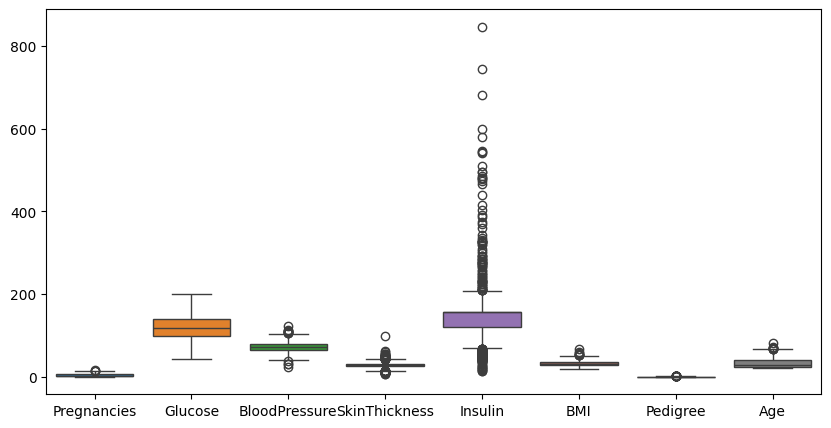

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(X)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [22]:
y_knn = knn.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [25]:
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_knn)}")
print(f"accuracy score: {accuracy_score(y_test, y_knn)}")
print(f"Error: {1 - accuracy_score(y_test, y_knn)}")
print(f"precision score: {precision_score(y_test, y_knn)}")
print(f"recall score: {recall_score(y_test, y_knn)}")
print(f"f1_score: {f1_score(y_test, y_knn)}")
print(f"classification report:\n{classification_report(y_test, y_knn)}")

Confusion Matrix:
[[35 15]
 [10 17]]
accuracy score: 0.6753246753246753
Error: 0.3246753246753247
precision score: 0.53125
recall score: 0.6296296296296297
f1_score: 0.576271186440678
classification report:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        50
           1       0.53      0.63      0.58        27

    accuracy                           0.68        77
   macro avg       0.65      0.66      0.66        77
weighted avg       0.69      0.68      0.68        77



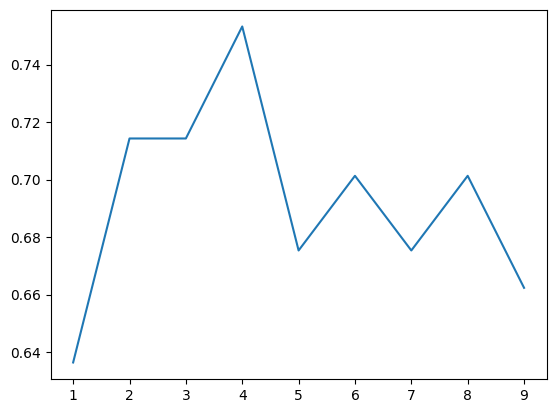

In [27]:
acc = []
ns = [i for i in range(1,10)]

for n in ns:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_knn = knn.predict(X_test)
    acc.append(accuracy_score(y_test, y_knn))

plt.plot(ns, acc)
plt.show()